In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Loading & Overview

Load the dataset and inspect its basic properties (shape, head, dtypes). Run these cells to confirm the data is loaded correctly before proceeding.

In [16]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


> ? represents NULL values

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital.status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.replace("?", pd.NA).dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis (EDA)

We will visualize distributions and relationships for key variables (education, age, hours per week, sex) to gain intuition about the data and potential predictors.

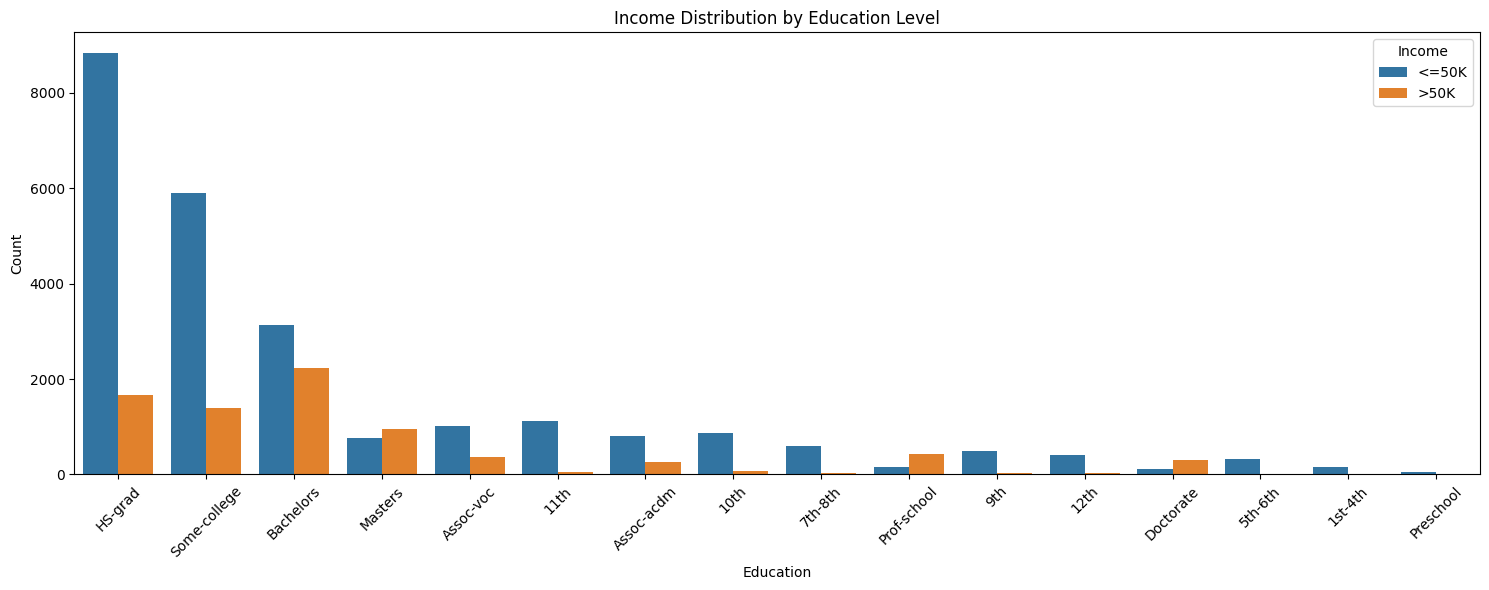

In [20]:
# Plot 1: Income distribution by education
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

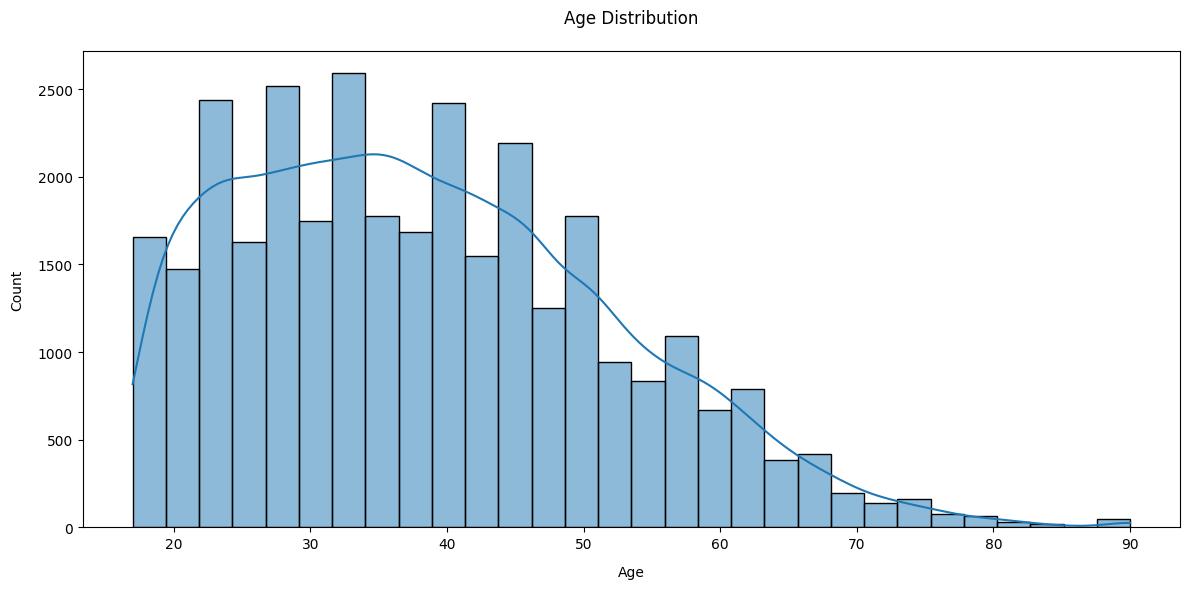

In [21]:
# 2. Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution', pad=20)
plt.xlabel('Age', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.tight_layout()
plt.show()

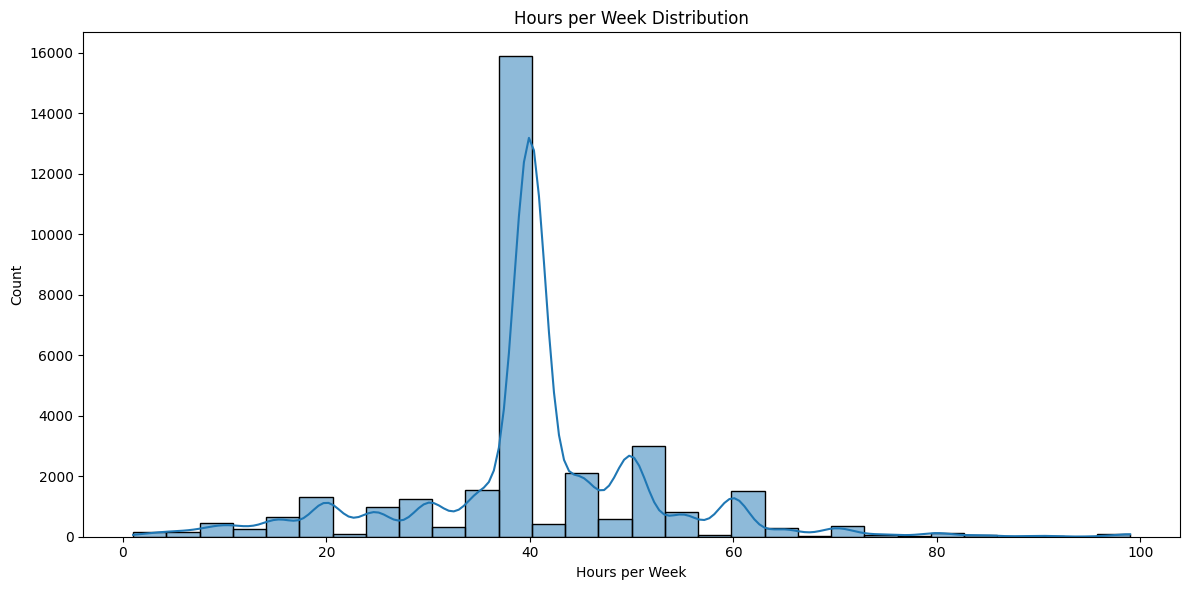

In [22]:
# Plot 3: Hours per week distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='hours.per.week', bins=30, kde=True)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

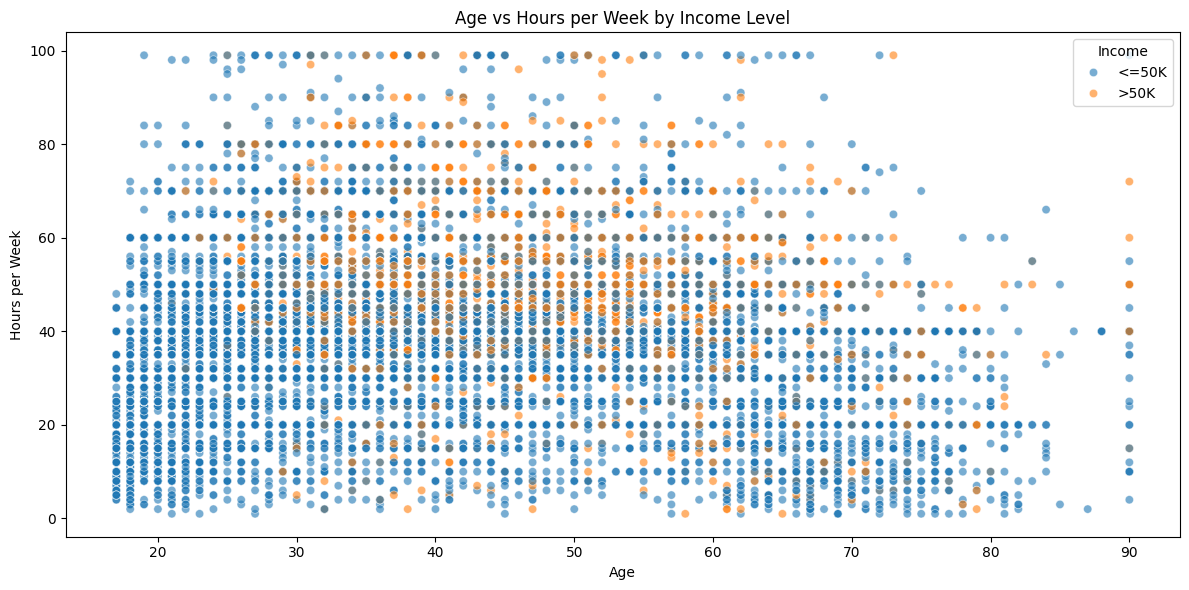

In [23]:
# Plot 4: Age vs Hours per Week by Income
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='hours.per.week', hue='income', alpha=0.6)
plt.title('Age vs Hours per Week by Income Level')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

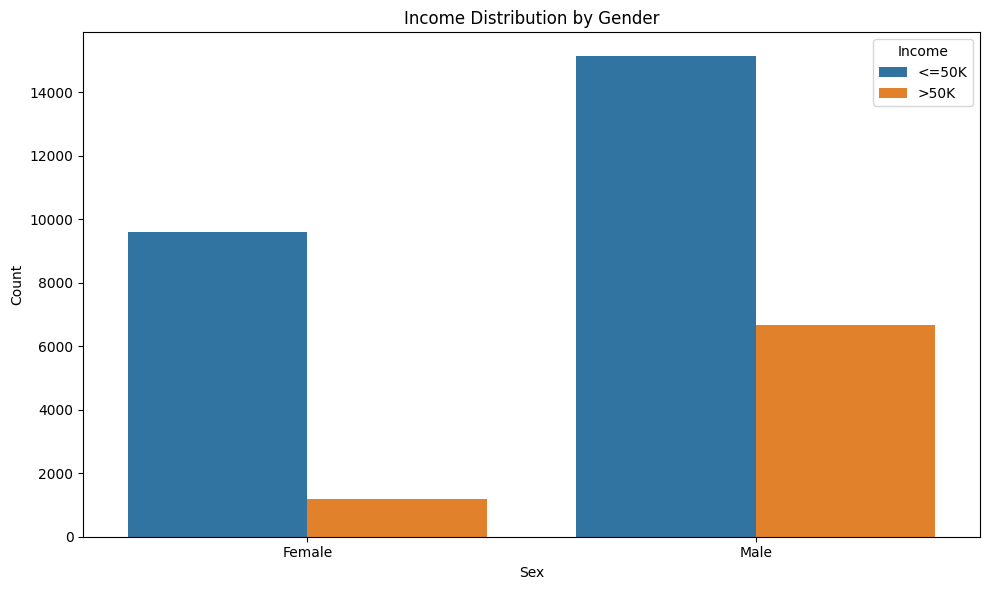

In [24]:
# Plot 5: Income distribution by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Income Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [ ]:
# Split features and target
X = df.drop("income", axis=1)
y = LabelEncoder().fit_transform(df["income"])

# Identify numeric and categorical columns
num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(include="object").columns

# Create preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

# Clustering Pipeline (KMeans)

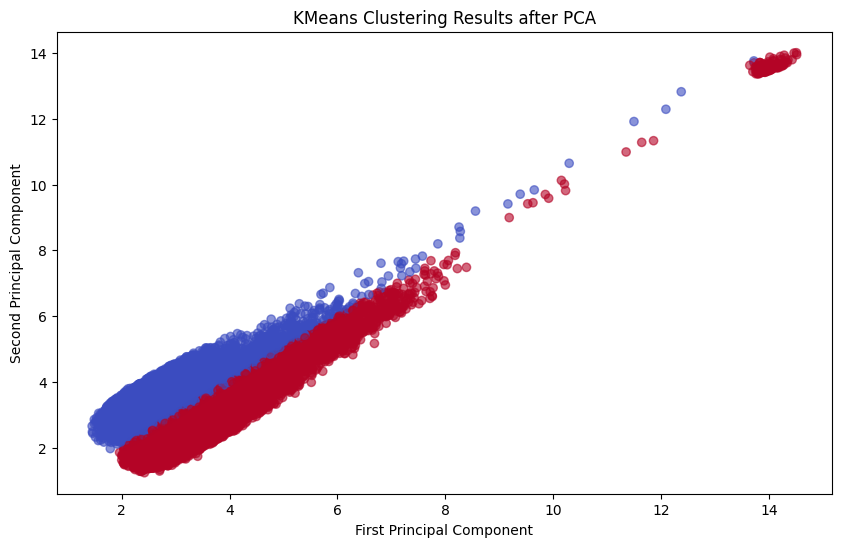

In [38]:
clustering_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

X_transformed = clustering_pipeline.fit_transform(X)
clusters = clustering_pipeline.fit_predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], 
           c=clusters, 
           cmap='coolwarm', alpha=0.6)

plt.title('KMeans Clustering Results after PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Classification Pipeline (Random Forest)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classification_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, 
                                random_state=42, n_jobs=-1))
])

classification_pipeline.fit(X_train, y_train)

y_pred = classification_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification Accuracy: {accuracy:.4f}")

Random Forest Classification Accuracy: 0.8466
